DATA ACQUISITION

# Davie's Burgers Subway Ad

## Davie's Burgers: The Sequel
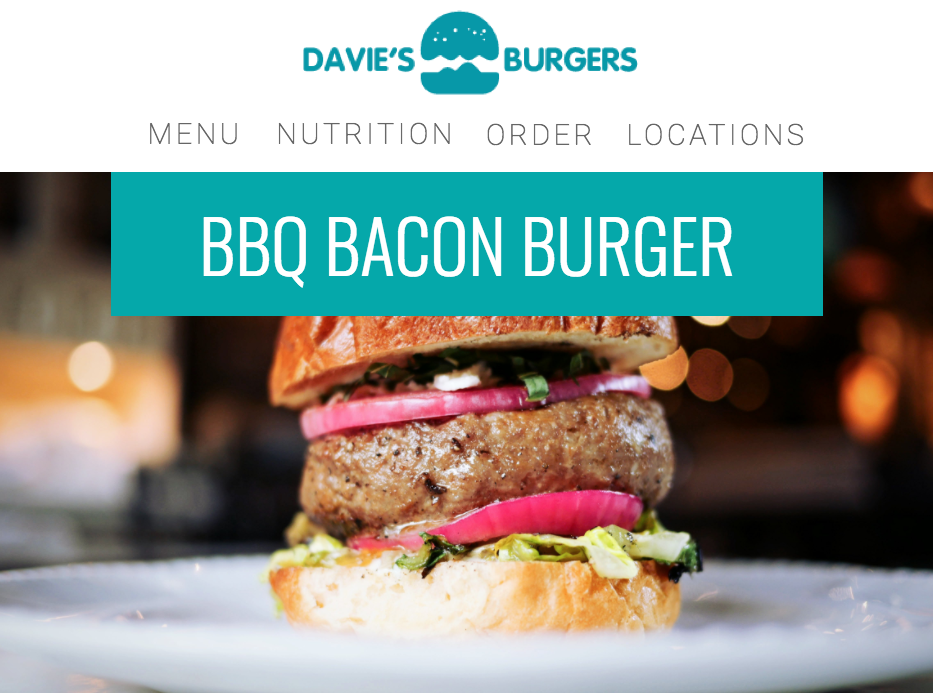 


## Davie’s Burgers is a chain of restaurants. Their restaurant business is booming and it is now looking to place a catchy advertisement in the local subway station.

## Let's hlp them dig into their orders table to see if there is anything interesting in there for a funny tagline!




### First, let's connect our Jupyter Notebook to our database file.

In [15]:
%%capture
%load_ext sql
%sql sqlite:///orders.db

### 1. Let's take a first look at the data to see what it looks like.

In [16]:
%%sql
 SELECT * FROM orders
 LIMIT 20;

 * sqlite:///orders.db
Done.


index,id,user_id,order_date,restaurant_id,item_name,special_instructions
0,1,43,2017-05-10,6,Beef Enchilada,ketchup
1,2,9,2017-06-30,3,Samosa,None
2,3,37,2017-06-15,1,Chicken Fajitas,Pickles on the side.
3,4,31,2017-06-13,5,Picadillo,SRIRACHA SAUCE
4,4,31,2017-06-13,5,Taquitos,None
5,5,22,2017-06-16,6,Beef Enchilada,no red onions.
6,5,22,2017-06-16,6,Beef Enchilada,None
7,5,22,2017-06-16,6,Flautas,None
8,5,22,2017-06-16,6,Salsa,None
9,6,27,2017-06-09,13,Cannelloni,None


The orders table has the following column names:

id, user_id, order_date, restaurant_id, item_name, special_instructions

### 2. Let's use DISTINCT to find out all the unique order_date values in this table and add an ORDER BY to sort the dates.

In [17]:
%%sql

SELECT DISTINCT order_date FROM orders
ORDER BY order_date DESC;

 * sqlite:///orders.db
Done.


order_date
2017-06-30
2017-06-28
2017-06-27
2017-06-26
2017-06-25
2017-06-24
2017-06-23
2017-06-22
2017-06-21
2017-06-18


__It looks like this data is from May and June of 2017.__

### 3. The special_instructions column stores the data where Davie’s Burgers customers leave a note for the kitchen or the delivery.

__Instead of selecting all the columns using *, write a query that selects only the special_instructions column.__

In [18]:

%%sql

SELECT special_instructions FROM orders 
LIMIT 20;

 * sqlite:///orders.db
Done.


special_instructions
ketchup
None
Pickles on the side.
SRIRACHA SAUCE
None
no red onions.
None
None
None
None


__There seem to be a lot of empty values in that column. That is because customers sometimes leave the notes section blank.__

### 4. Let's edit the query so that we are only returning the special instructions that are not empty.

In [19]:

%%sql

SELECT special_instructions FROM orders
WHERE special_instructions IS NOT NULL;

 * sqlite:///orders.db
Done.


special_instructions
ketchup
Pickles on the side.
SRIRACHA SAUCE
no red onions.
ring doorbell
Hey! You forgot my pickles last time. Pickles in a separate container please.
asdf
Walk to the garage and start singing the Lion King intro. I'll come out.
*DIET* coke
*DIET* coke


### 5. Let’s go even further and sort the instructions in alphabetical order (A-Z).

In [20]:

%%sql

SELECT special_instructions FROM orders
WHERE special_instructions IS NOT NULL
ORDER BY special_instructions ASC;

 * sqlite:///orders.db
Done.


special_instructions
#hangry
#hangry
#hangry
*DIET* coke
*DIET* coke
.
Arrange the meat on the pizza so that it spells out the name of each meat.
BBQ sauce
Beef milk please
Cleanse yourself with the sage in the mailbox.


__Awesome! Now we have a good idea of the list.__

### 6. Let’s search for special instructions that have the word ‘sauce’ to see if there are any funny or interesting ones.

In [21]:

%%sql

SELECT special_instructions FROM orders
WHERE special_instructions LIKE '%sauce%';

 * sqlite:///orders.db
Done.


special_instructions
SRIRACHA SAUCE
BBQ sauce
mild sauce


__There ain't any inetersting or funny instructions with sauce order.__ 

### 7. Let’s search for special instructions that have the word ‘door’.

__Any funny or interesting ones?__

In [22]:

%%sql

SELECT special_instructions FROM orders
WHERE special_instructions LIKE '%door%';

 * sqlite:///orders.db
Done.


special_instructions
ring doorbell
kids sleeping. please don't ring the doorbell thank u!
Door Code: Codecademy
super hungover. let yourself in pass the fridge turn left and double doors my bedroom. im in my pajamas watching james bond 1love


### 8. Let’s search for special instructions that have the word ‘box’.

__Any funny or interesting ones?__

In [23]:

%%sql

SELECT special_instructions FROM orders
WHERE special_instructions LIKE '%box%';

 * sqlite:///orders.db
Done.


special_instructions
Draw a dragon fighting flamingo on the pizza box.
Cleanse yourself with the sage in the mailbox.
Draw a narwhal on the delivery box.
write me a poem on the pizza box.
Draw Yoda on pizza box.
beat me tic-tac-toe on the pizza box for $5 tip
beat me tic-tac-toe on the pizza box for $5 tip
my coworker and i are working overtime. can u write some inspiration/motivations on the box. u rock!



__Wow, some of these are marketing gold! But what are their order numbers?__

### 9. Instead of just returning the special instructions, let's also return their order ids.

__For more readability:__

__Rename id as ‘#’
Rename special_instructions as ‘Notes’__

In [24]:
%%sql

SELECT id AS '#', special_instructions AS 'notes'
FROM orders
WHERE special_instructions LIKE '%box%';

 * sqlite:///orders.db
Done.


#,notes
15,Draw a dragon fighting flamingo on the pizza box.
27,Cleanse yourself with the sage in the mailbox.
28,Draw a narwhal on the delivery box.
29,write me a poem on the pizza box.
40,Draw Yoda on pizza box.
62,beat me tic-tac-toe on the pizza box for $5 tip
95,beat me tic-tac-toe on the pizza box for $5 tip
97,my coworker and i are working overtime. can u write some inspiration/motivations on the box. u rock!


### CONCLUSION:

__Great work! We have found special instructions that are funny and ridiculous - the perfect combo for a Davie’s Burgers tagline.__

__The marketing agency took it from there and worked out a [subway ad](https://static-assets.codecademy.com/content/codecademy-content-sites/learn-sql-orders-project/index.html) in no time!__